# Homework 4
Nikki Gerjarusak

In [1]:
!pip install aimodelshare

## Part 1: Build a classification model using text data



### Import the text data

In [2]:
## load dataset 
import aimodelshare as ai
X_train, X_test, y_train_labels, y_test_labels, example_data, lstm_model, lstm_model2 = ai.import_quickstart_data("clickbait")


Data downloaded successfully.

Preparing downloaded files for use...

Success! Your Quick Start materials have been downloaded. 
You are now ready to run the tutorial.


In [3]:
print(X_train.shape)

(24979,)


In [4]:
print(X_train)

0           MyBook Disk Drive Handles Lots of Easy Backups
1                           CIT Posts Eighth Loss in a Row
2        Candy Carson Singing The "National Anthem" Is ...
3        Why You Need To Stop What You're Doing And Dat...
4        27 Times Adele Proved She's Actually The Reale...
                               ...                        
24974                    What Does Your Hair Say About You
24975    At least 200 New Orleans police officers quit ...
24976    38 Hilarious Vines We Couldn't Stop Watching I...
24977    Political Swing at Tennis Player Sours Dubai T...
24978    United States military death toll in Iraq reac...
Name: headline, Length: 24979, dtype: object


In [5]:
print(y_train_labels)

13620    not clickbait
15394    not clickbait
2796         clickbait
1673         clickbait
13020        clickbait
             ...      
11764        clickbait
7807     not clickbait
12581        clickbait
8444     not clickbait
15385    not clickbait
Name: label, Length: 24979, dtype: object


### Vectorize the clickbait headline column into an X matrix

In [6]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer().fit(X_train)
X = vect.transform(X_train)
X.toarray()
X = X
y = y_train_labels

print("X with min_df: {}".format(repr(X)))

X with min_df: <24979x20332 sparse matrix of type '<class 'numpy.int64'>'
	with 220242 stored elements in Compressed Sparse Row format>


In [7]:
## set up training and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## see shape 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(18734, 20332)
(18734,)
(6245, 20332)
(6245,)


### Logistic Regression 

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=10, scoring="roc_auc") ## AUC scoring
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.7f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best cross-validation score: 0.9959219
Best parameters:  {'C': 10}


In [9]:
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=10, scoring="roc_auc")
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.7f}".format(grid.best_score_))

log1= LogisticRegression(max_iter=1000, C=grid.best_params_['C']).fit(X_train, y_train)
scores = cross_val_score(LogisticRegression(max_iter=1000, C=grid.best_params_['C']), X_train, y_train, cv=5,scoring="roc_auc")
print("Mean cross-validation accuracy for Training Data: {:.7f}".format(np.mean(scores)))

log2=LogisticRegression(max_iter=1000, C=grid.best_params_['C']).fit(X_test, y_test)
scores = cross_val_score(LogisticRegression(max_iter=1000, C=grid.best_params_['C']), X_test, y_test, cv=5,scoring="roc_auc")
print("Mean cross-validation accuracy for Testing Data: {:.7f}".format(np.mean(scores)))
print("Test score: {:.4f}".format(grid.score(X_test, y_test)))

Best cross-validation score: 0.9959219
Mean cross-validation accuracy for Training Data: 0.9956822
Mean cross-validation accuracy for Testing Data: 0.9913297
Test score: 0.9949


### Investigation model coefficients

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns; sns.set()

## from class notebook
def visualize_coefficients(coefficients, feature_names, n_top_features=25):
    coefficients = coefficients.squeeze()
    if coefficients.ndim > 1:
        # this is not a row or column vector
        raise ValueError("coeffients must be 1d array or column vector, got"
                         " shape {}".format(coefficients.shape))
    coefficients = coefficients.ravel()

    if len(coefficients) != len(feature_names):
        raise ValueError("Number of coefficients {} doesn't match number of"
                         "feature names {}.".format(len(coefficients),
                                                    len(feature_names)))
    ## get coefficients with large absolute values
    coef = coefficients.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients,
                                          positive_coefficients])
    ## plot them
    plt.figure(figsize=(15, 5))
    colors = ['#ff2020' if c < 0 else '#0000aa'
              for c in coef[interesting_coefficients]]
    plt.bar(np.arange(2 * n_top_features), coef[interesting_coefficients],
            color=colors)
    feature_names = np.array(feature_names)
    plt.subplots_adjust(bottom=0.3)
    plt.xticks(np.arange(1, 1 + 2 * n_top_features),
               feature_names[interesting_coefficients], rotation=60,
               ha="right")
    plt.ylabel("Coefficient magnitude")
    plt.xlabel("Feature")

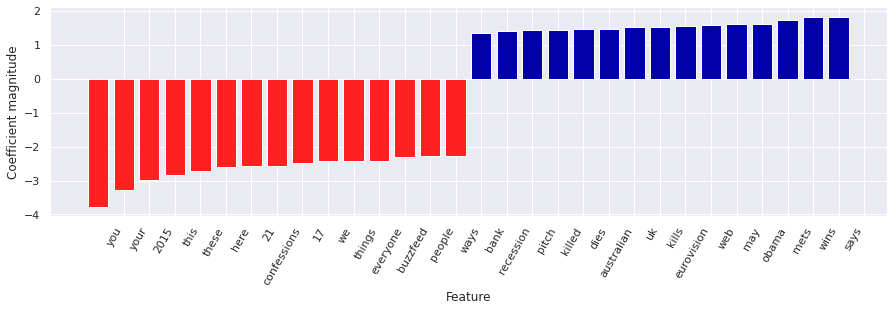

In [11]:
coefs = LogisticRegression(C=1, max_iter=1000).fit(X_train,y_train).coef_ ## C = 1 best parameter 
feature_names = vect.get_feature_names()
visualize_coefficients(coefs, feature_names, n_top_features=15)

### Tokenization 1

In [12]:
! pip install pyprind
! pip install nltk

In [18]:
import aimodelshare as ai
X_train, X_test, y_train_labels, y_test_labels, example_data, lstm_model, lstm_model2 = ai.import_quickstart_data("clickbait")


Data downloaded successfully.

Preparing downloaded files for use...

Success! Your Quick Start materials have been downloaded. 
You are now ready to run the tutorial.


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer

text_train = X_train
vect_1 = TfidfVectorizer(ngram_range=(1,3) ,min_df=2, norm=None).fit(text_train)
X = vect_1.transform(text_train)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(max_iter=1000),param_grid, cv=10)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.4f}".format(grid.best_score_))
print("Best parameters:\n{}".format(grid.best_params_))
print("Test set score: {:.4f}".format(grid.score(X_test, y_test)))

Best cross-validation score: 0.9741
Best parameters:
{'C': 10}
Test set score: 0.9718


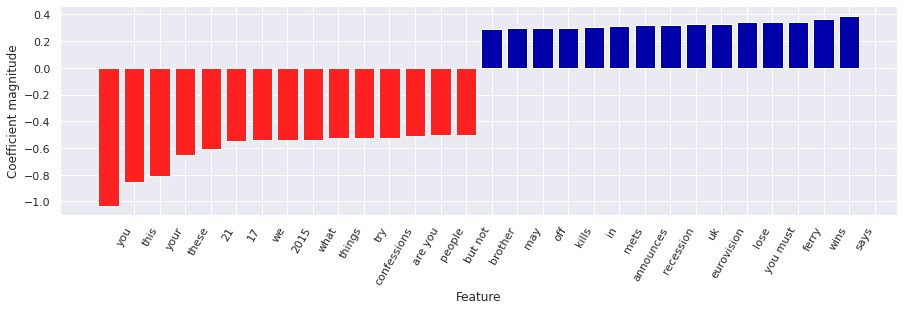

In [15]:
## visualize 
coef_1 = LogisticRegression(C=0.1,max_iter=1000).fit(X_train,y_train).coef_ ## C = 0.1
feature_names_1 = vect_1.get_feature_names()
visualize_coefficients(coef_1, feature_names_1, n_top_features=15)

### Tokenization 2

In [20]:
vect_2 = CountVectorizer(min_df=5, ngram_range=(1, 5)).fit(text_train)
X = vect_2.transform(text_train)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

grid_1 = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=10)
grid_1.fit(X_train, y_train)
print("Best cross-validation score: {:.5f}".format(grid_1.best_score_))
print("Best parameters: ", grid_1.best_params_)
print("Test set score: {:.5f}".format(grid_1.score(X_test, y_test)))

Best cross-validation score: 0.97171
Best parameters:  {'C': 10}
Test set score: 0.96910


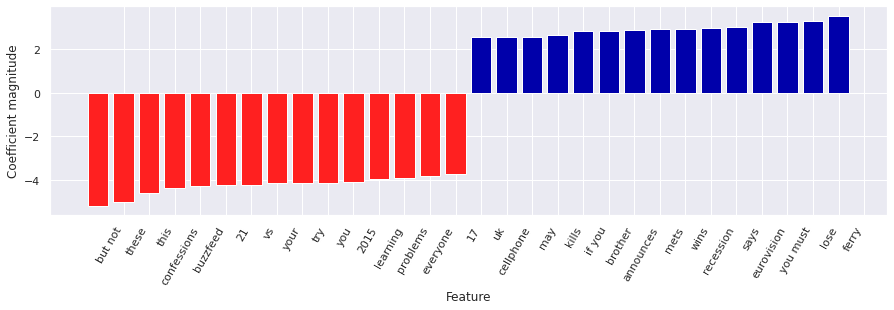

In [21]:
coef_2 = LogisticRegression(C=10, max_iter=1000).fit(X_train,y_train).coef_ ## C = 10
feature_names_2 = vect_2.get_feature_names()
visualize_coefficients(coef_2, feature_names_2, n_top_features=15)

### Tokenization 3

In [22]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

vect_3 = TfidfVectorizer(min_df = 2, stop_words='english', norm=None,).fit(text_train)
X = vect_3.transform(text_train)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

grid_2 = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=10)
grid_2.fit(X_train, y_train)
print("Best cross-validation score: {:.5f}".format(grid_2.best_score_))
print("Best parameters: ", grid_2.best_params_)
print("Test set score: {:.5f}".format(grid_2.score(X_test, y_test)))

Best cross-validation score: 0.95409
Best parameters:  {'C': 0.01}
Test set score: 0.95164


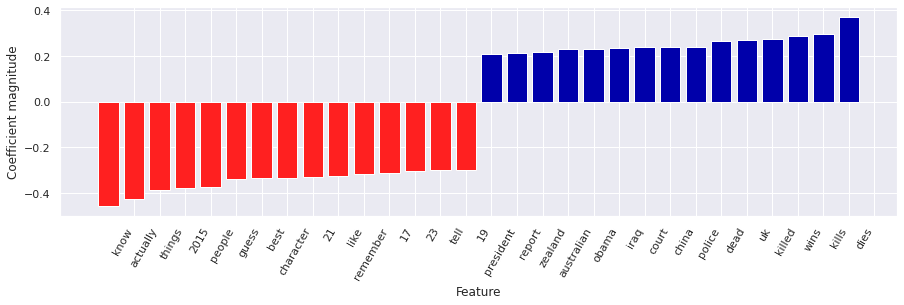

In [23]:
coef_3 = LogisticRegression(C=0.01, max_iter=1000).fit(X_train,y_train).coef_ ## C = 0.01
feature_names_3 = vect_3.get_feature_names()
visualize_coefficients(coef_3, feature_names_3, n_top_features=15)


My results show that the best model is the first logistic regression without any tokenization implemented into the model. The logistic regression model produced outcomes inlcuding a best cross-validation score of 0.996 and a test score of 0.995. The mean cross-validation accuracy for training data is 0.996 and the mean cross-validation accuracy for testing data 0.991. The second highest scoring model was the first tokenization approach with a cross-validation score of 0.974 and a test score of 0.972. For this approach, the TF-IDF vectorizer is used alongside a chosen ngram range of 1 to 3 and 
min_df of 2. The second tokenization approach is the following highest scoring model with a best cross-validation score of 0.972 and test set score of 0.969.
This approach instead utilizes the Count Vectorizer in unison with a ngram range of 1 to 5 and a min_df of 5. Finally the lowest scorest model is the last tokenization approach which also uses the TF-IDF vectorized but instead involves the removing of stop words and a min_df of 2. This model scores a best cross-validation score of 0.954 and a test set score of 0.952 which makes it the worst performing model. 

The first logistic regression model without any tuning or implemented features ended up performing the best out of all of them. From the graph produced, we can see the coefficients with the highest and lowest magnitude. The higher the magnitude of the coefficient indicates that the word is not utilized for clickbait. For the first logistical model, the words with the highest magnitude were says, mets, and wins while the words with the lowest magnitude signifying clickbait were you, your, and 2015.

## Part 2: Build a predictive neural network using Keras

### Run a multilayer perceptron (feed forward neural network) with two hidden layers on the iris dataset using the keras Sequential interface.

In [24]:
## import iris
import pandas as pd

iris = pd.read_csv("http://vincentarelbundock.github.io/Rdatasets/csv/datasets/iris.csv")
iris.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [25]:
## set up for train test split
iris = iris.iloc[:,1:]
y = iris['Species']
X = iris.loc[:, iris.columns != 'Species']

In [26]:
## train test split
X_train, X_test, X_train, y_test = train_test_split(X, y, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(112,)
(18734,)
(38, 4)
(38,)


### Include code for selecting the number of hidden units using GridSearchCV and evaluation on a test-set.

#### Keras Sequential Inferace 1

In [27]:
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import SGD
from pylab import rcParams

import math
model = Sequential()
%matplotlib inline

def create_model(hiddennodes=1): 
	## create model
	model = Sequential()
	model.add(Dense(hiddennodes, input_dim=4, activation='relu'))
	model.add(Dense(10, activation='relu'))
	model.add(Dense(3, activation='softmax')) ## use softmax for multiclass analysis
	## Compile model
	model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
	return model

model = KerasClassifier(build_fn=create_model, epochs=100, verbose=0) 

## Building a simple search grid that adjusts epochs
param_grid = dict(hiddennodes=[10,20,30,40,50,60,70,80])
grid_1 = GridSearchCV(estimator=model, param_grid=param_grid)
grid_1_result = grid_1.fit(X_test, y_test)

print("Best: %f using %s" % (grid_1_result.best_score_, grid_1_result.best_params_))
print("Test set score: {:.4f}".format(grid_1.score(X_test, y_test)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.


Best: 0.742857 using {'hiddennodes': 10}
Test set score: 0.8684


#### Keras Sequential Inferace 2

In [28]:
def create_model(hiddennodes=1, learn_rate=0.01):
	model = Sequential()
	model.add(Dense(hiddennodes, input_dim=4, activation='relu'))
	model.add(Dense(22, activation='relu'))
	model.add(Dense(3, activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
	return model

model = KerasClassifier(build_fn=create_model, epochs=100, verbose=0) 

param_grid = dict(hiddennodes=[10,20,30,40,50,60,70,80])
param_grid = [{'hiddennodes' : (10,20,30,40,50,60,70,80) , 'learn_rate': (0.001, 0.01, 0.1)}]
grid_2 = GridSearchCV(estimator=model, param_grid=param_grid)
grid_2_result = grid_2.fit(X_test, y_test)

print("Best: %f using %s" % (grid_2_result.best_score_, grid_2_result.best_params_))
print("Test set score: {:.4f}".format(grid_2.score(X_test, y_test)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  if __name__ == '__main__':


Best: 0.821429 using {'hiddennodes': 80, 'learn_rate': 0.01}
Test set score: 0.9474


#### Keras Sequential Inferace 3

In [31]:
def create_model(hiddennodes=1, learn_rate=0.001):
	model = Sequential()
	model.add(Dense(hiddennodes, input_dim=4, activation='relu'))
	model.add(Dense(32, activation='relu'))
	model.add(Dense(3, activation='softmax'))
	optimizer = SGD(learning_rate=learn_rate)
	model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
	return model

model = KerasClassifier(build_fn=create_model, epochs=100, verbose=0) 

param_grid = dict(hiddennodes=[10,20,30,40,50,60,70,800])
param_grid = [{'hiddennodes' : (10,20,30,40,50,60,70,80) , 'learn_rate': (0.0001, 0.001, 0.01, 0.1)}]
grid_3 = GridSearchCV(estimator=model, param_grid=param_grid)
grid_3_result = grid_3.fit(X_test, y_test)


print("Best: %f using %s" % (grid_3_result.best_score_, grid_3_result.best_params_))
print("Test set score: {:.4f}".format(grid_3.score(X_test, y_test)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  # Remove the CWD from sys.path while we load stuff.


Best: 0.825000 using {'hiddennodes': 50, 'learn_rate': 0.001}
Test set score: 0.8684


###  Describe the differences in the predictive accuracy of models with different numbers of hidden units.  Describe the predictive strength of your best model.  Be sure to explain your choice and evaluate this model using the test set.

In the first Keras Sequential Interface model, the hidden nodes tuning parameter is used which produces a best score of 0.743 and a test set score of 0.868. For this particular model, the results indicate that the optimal amount of hidden nodes is 10. The second model additionally involves the learning rate parameter alongside the previously used hidden nodes tuning parameter. This second model produces a best score of 0.821 and a test set score of 0.947. The results show that the optimal number hidden nodes is 80 which the optimal learn rate is 0.01. Lastly, in model 3, we also tune the hidden nodes and learning rate. This model has a best score of 0.825 and a test score of 0.868. The optimal amount of hidden nodes here is 50 and the the optimal learn rate is 0.001. 